# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [4]:
df.describe()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
count,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,3820.000000,3.212800e+04,3.151500e+04,4.756900e+04
mean,41.524480,53.642820,1.288144e+04,6.033691e+04,8.126498e+04,7.002303e+04,6.860816e+04,105.011400,2.207407e+05,2.600832e+04,...,7.534701e+04,8.875132e+04,7.891208e+04,5.556172e+04,6.509508e+04,5.534414e+04,18.236559,5.279361e+03,3.384532e+02,1.205378e+04
std,12.866034,47.430416,1.874505e+05,2.017564e+05,2.860175e+05,1.679410e+06,1.748867e+06,192.687683,6.008022e+05,4.359979e+05,...,2.758174e+05,3.004066e+05,2.749138e+05,1.896891e+05,2.113224e+05,1.725155e+05,269.329001,1.598972e+04,2.936955e+04,4.532125e+04
min,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.684957e-04
25%,32.000000,13.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.143703e+02,8.005211e-02,2.695975e+02
50%,40.000000,37.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.600000e+02,14.000000,3.500108e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.716181e+03,3.017687e-01,1.379604e+03
75%,51.000000,81.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.762365e+03,122.000000,2.603239e+05,3.162002e+04,...,0.000000e+00,0.000000e+00,3.868709e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.416583e+03,1.532015e+00,9.781835e+03
max,98.000000,236.000000,1.467568e+07,7.354568e+06,1.467568e+07,3.305000e+08,2.474474e+08,2970.000000,3.634105e+07,9.060000e+07,...,1.467568e+07,1.481199e+07,1.502391e+07,5.646888e+06,7.501889e+06,4.112823e+06,12521.279170,1.749500e+06,5.000000e+06,4.691796e+06


In [5]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

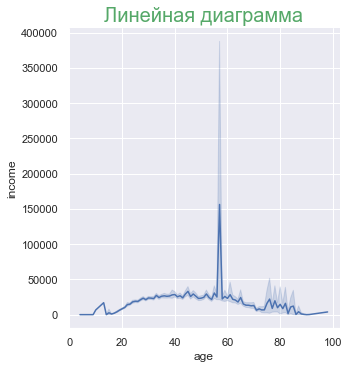

In [6]:
sns.set(style='darkgrid')  
# зависимость дохода от возраста
sns.relplot(
    x='age', 
    y='income', 
    data=df, 
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');

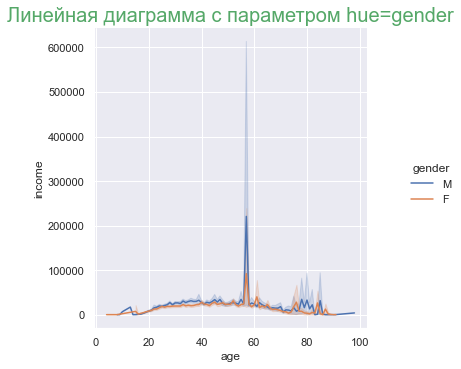

In [7]:
# зависимость дохода от возраста и пола 
sns.relplot(
    x='age', 
    y='income', 
    hue='gender', 
    data=df, kind='line')
plt.title('Линейная диаграмма с параметром hue=gender', size=20, color='g');

/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points canno

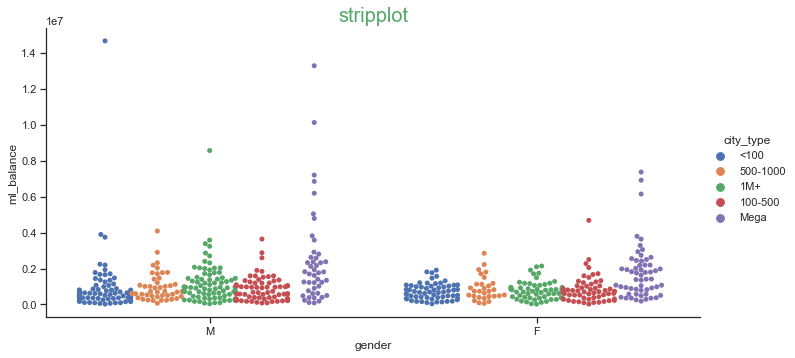

In [8]:
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)

sns.catplot(
    x='gender',
    y='ml_balance', 
    data=df.query('ml_balance > 0'), 
    hue='city_type',
    aspect=2, 
    kind='swarm', 
    dodge=True
) 

plt.title('stripplot', size=20, color='g');

In [9]:
# добавим новую колонку с кратким описанием длительности отношений с банком
def get_mob_short(full_mob_value):
    if full_mob_value < 30:
        return '< 30'
    elif full_mob_value >= 30 and full_mob_value <= 50:
        return '[30; 50]'
    elif full_mob_value > 50 and full_mob_value < 100:
        return '(50; 100)'
    else:
        return '>= 100'
df['full_mob_short'] = df.full_mob.apply(get_mob_short)
df[['full_mob', 'full_mob_short']].head()

,full_mob,full_mob_short
0,103,>= 100
1,81,(50; 100)
2,81,(50; 100)
3,81,(50; 100)
4,81,(50; 100)


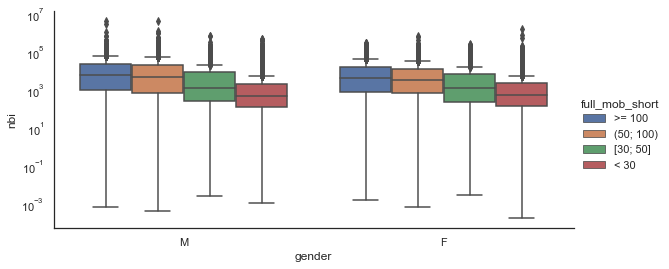

In [151]:
s = sns.catplot(
    x='gender',
    y='nbi', 
    data=df,
    hue='full_mob_short', 
    kind='box', 
    dodge=True,
    height=4, 
    aspect=2
) 
s.set(yscale='log')

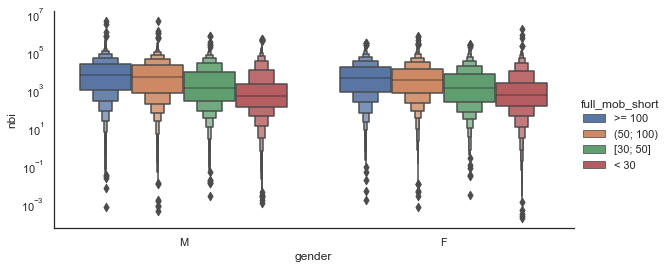

In [153]:
s = sns.catplot(
    x='gender',
    y='nbi', 
    data=df,
    hue='full_mob_short', 
    kind='boxen', 
    dodge=True,
    height=4, 
    aspect=2
) 
s.set(yscale='log')

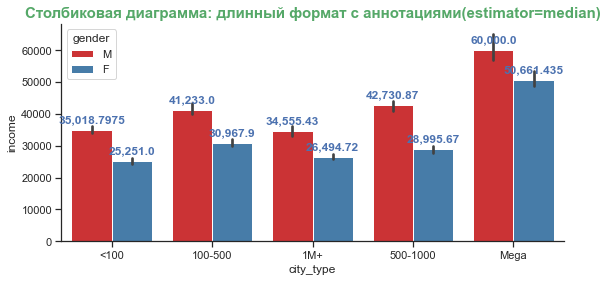

In [12]:
from numpy import median

plt.figure(figsize=(9,4))
b = sns.barplot(
    x='city_type', 
    y='income', 
    data=df.query('income > 0'), 
    estimator=median, 
    palette='Set1',
    hue='gender',
)

# b.set(yscale='log', ylim=[0, 100000])
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )

plt.title('Столбиковая диаграмма: длинный формат с аннотациями(estimator=median)', size=15, color='g', 
          weight='bold');

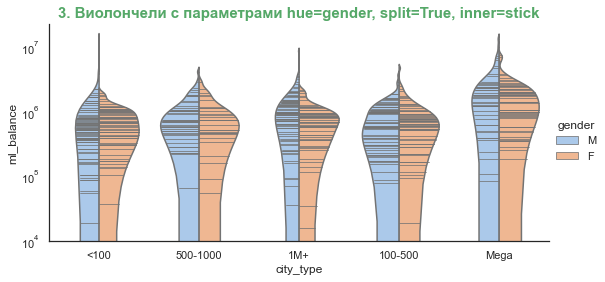

In [154]:
s = sns.catplot(
    x='city_type', 
    y='ml_balance', 
    data=df.query('ml_balance > 0'), 
    kind='violin', 
    hue='gender', 
    split=True, 
    inner="stick", 
    palette="pastel",
    height=4, 
    aspect=2)
s.set(yscale='log')
plt.title('3. Виолончели с параметрами hue=gender, split=True, inner=stick', size=15, color='g', weight='bold');

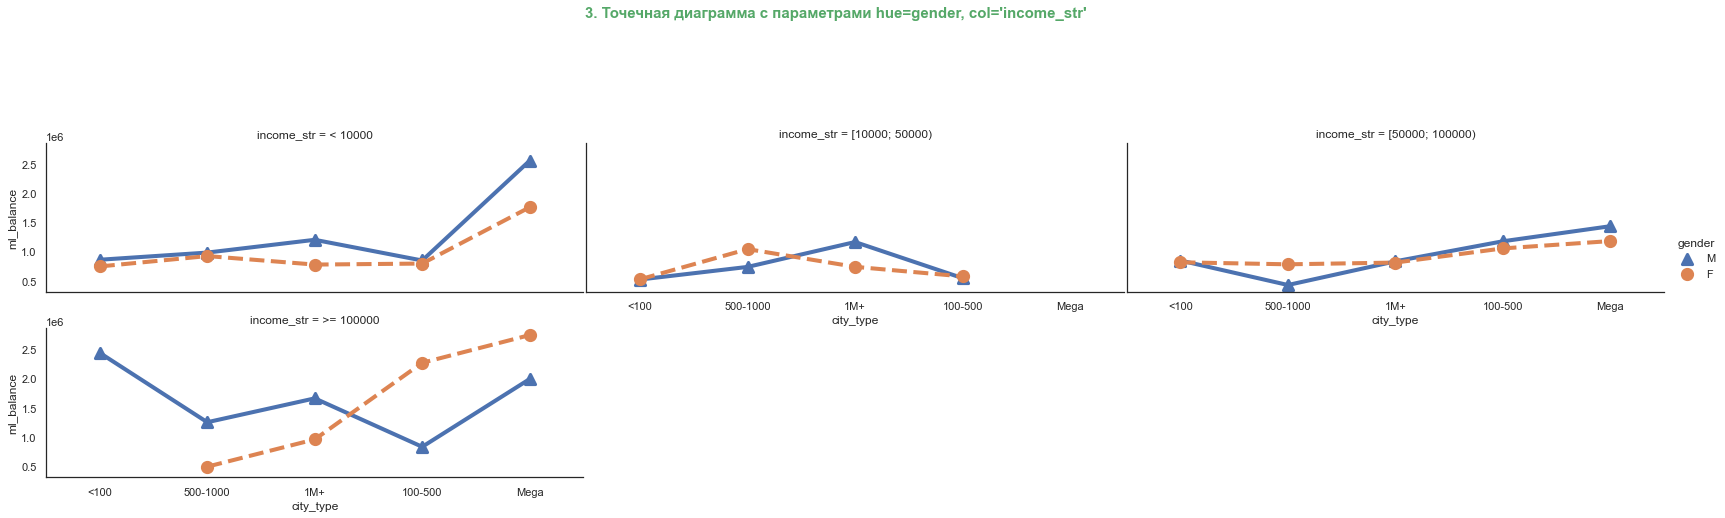

In [68]:
def income_to_str(income):
    if income < 10000:
        return '< 10000'
    elif income < 50000:
        return '[10000; 50000)'
    elif income < 100000:
        return '[50000; 100000)'
    else:
        return '>= 100000'
    
df['income_str'] = df.income.map(income_to_str)

sns.catplot(
    x='city_type', 
    y='ml_balance', 
    data=df.query('ml_balance > 0'), 
    kind='point', 
    hue='gender', 
    col_order=['< 10000', '[10000; 50000)', '[50000; 100000)', '>= 100000'],
    markers=["^", "o"], 
    linestyles=["-", "--"], 
    ci=None, 
    col='income_str', 
    col_wrap=3,
    height=4, 
    aspect=2, 
    scale=1.5)
plt.suptitle("3. Точечная диаграмма с параметрами hue=gender, col='income_str'", size=15, color='g', weight='bold')
plt.tight_layout(pad=5,w_pad=0.25, h_pad=0.25);

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


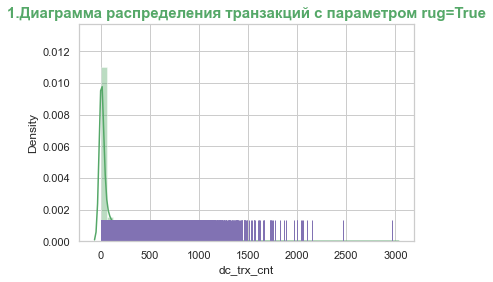

In [15]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.dc_trx_cnt,
    color='g', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения транзакций с параметром rug=True', size=15, color='g', weight='bold')
plt.show();

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


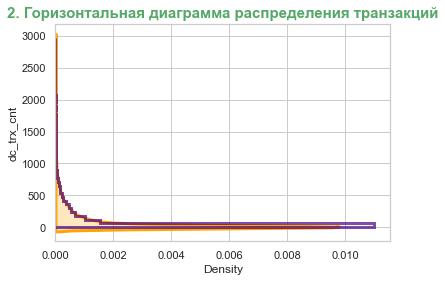

In [16]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.dc_trx_cnt,
    vertical=True,                #hist=False
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"}
)
plt.title('2. Горизонтальная диаграмма распределения транзакций', size=15, color='g', weight='bold')   
plt.show();

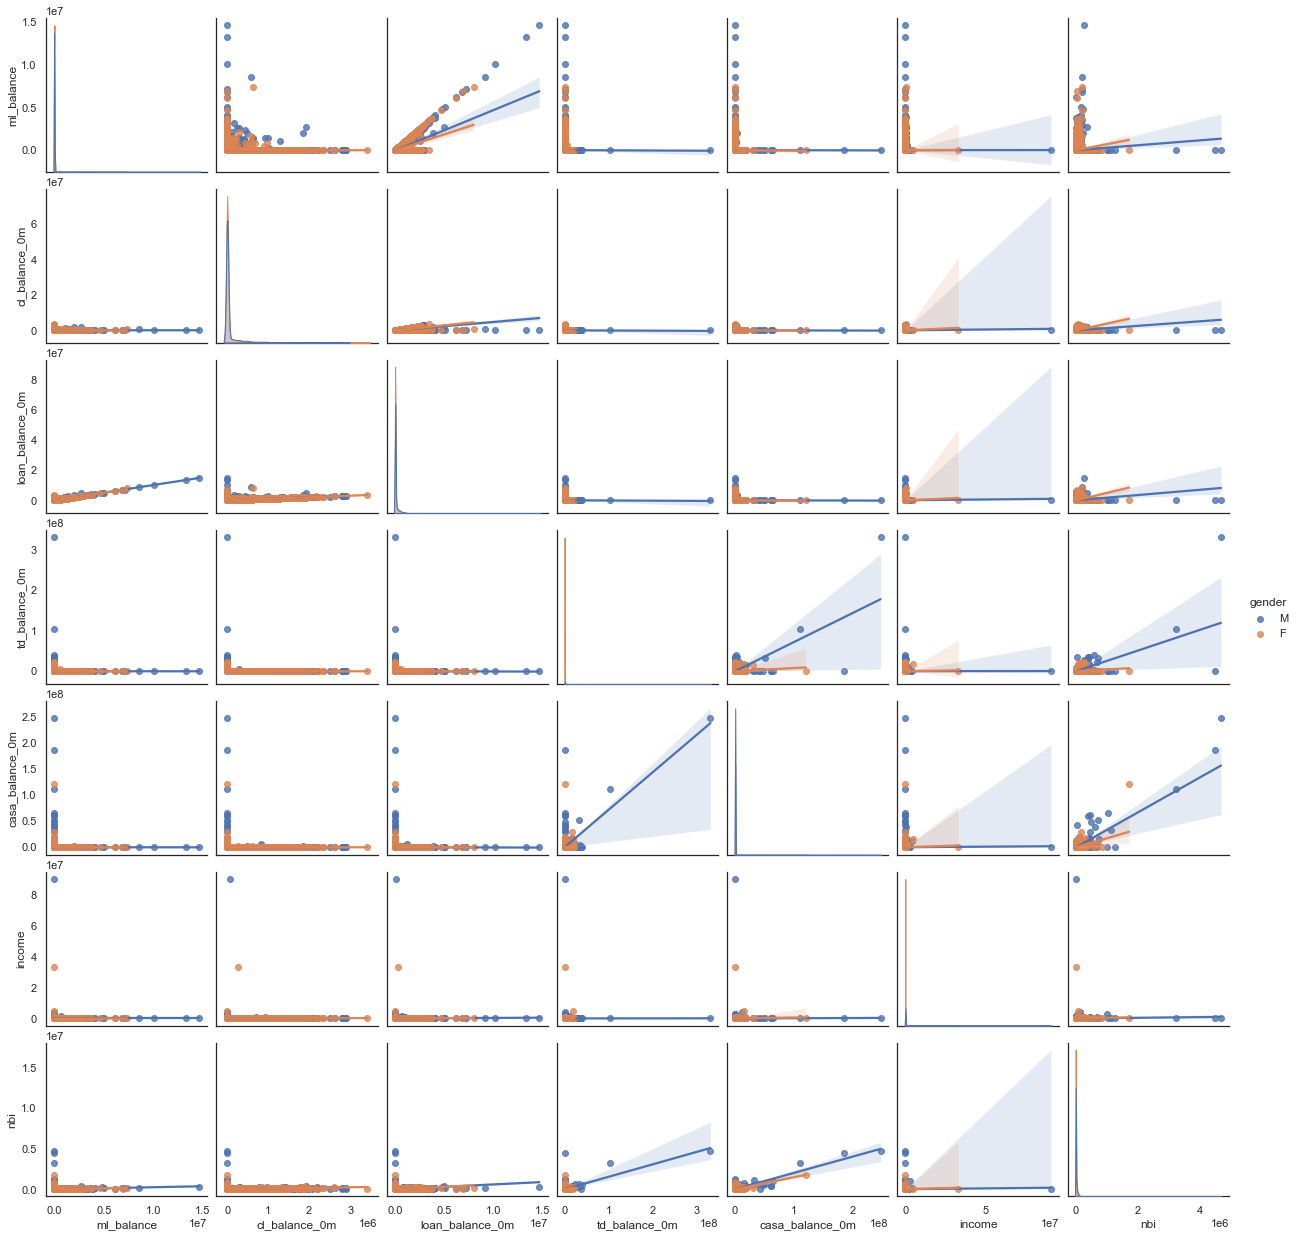

In [70]:
columns = ['ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'income', 'gender', 'nbi']
items = df[columns]
sns.pairplot(
    items,
    hue='gender',
    kind='reg'
)
plt.show();

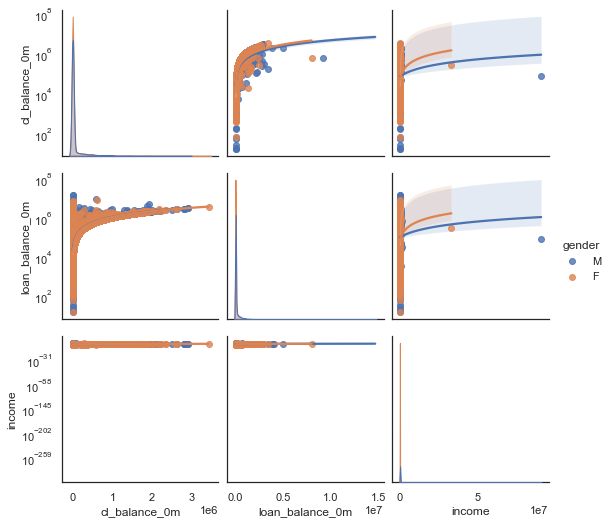

In [71]:
s = sns.pairplot(
    items,
    hue='gender',
    vars=['cl_balance_0m', 'loan_balance_0m', 'income'],
    kind='reg'
)
s.set(yscale='log')
plt.show();

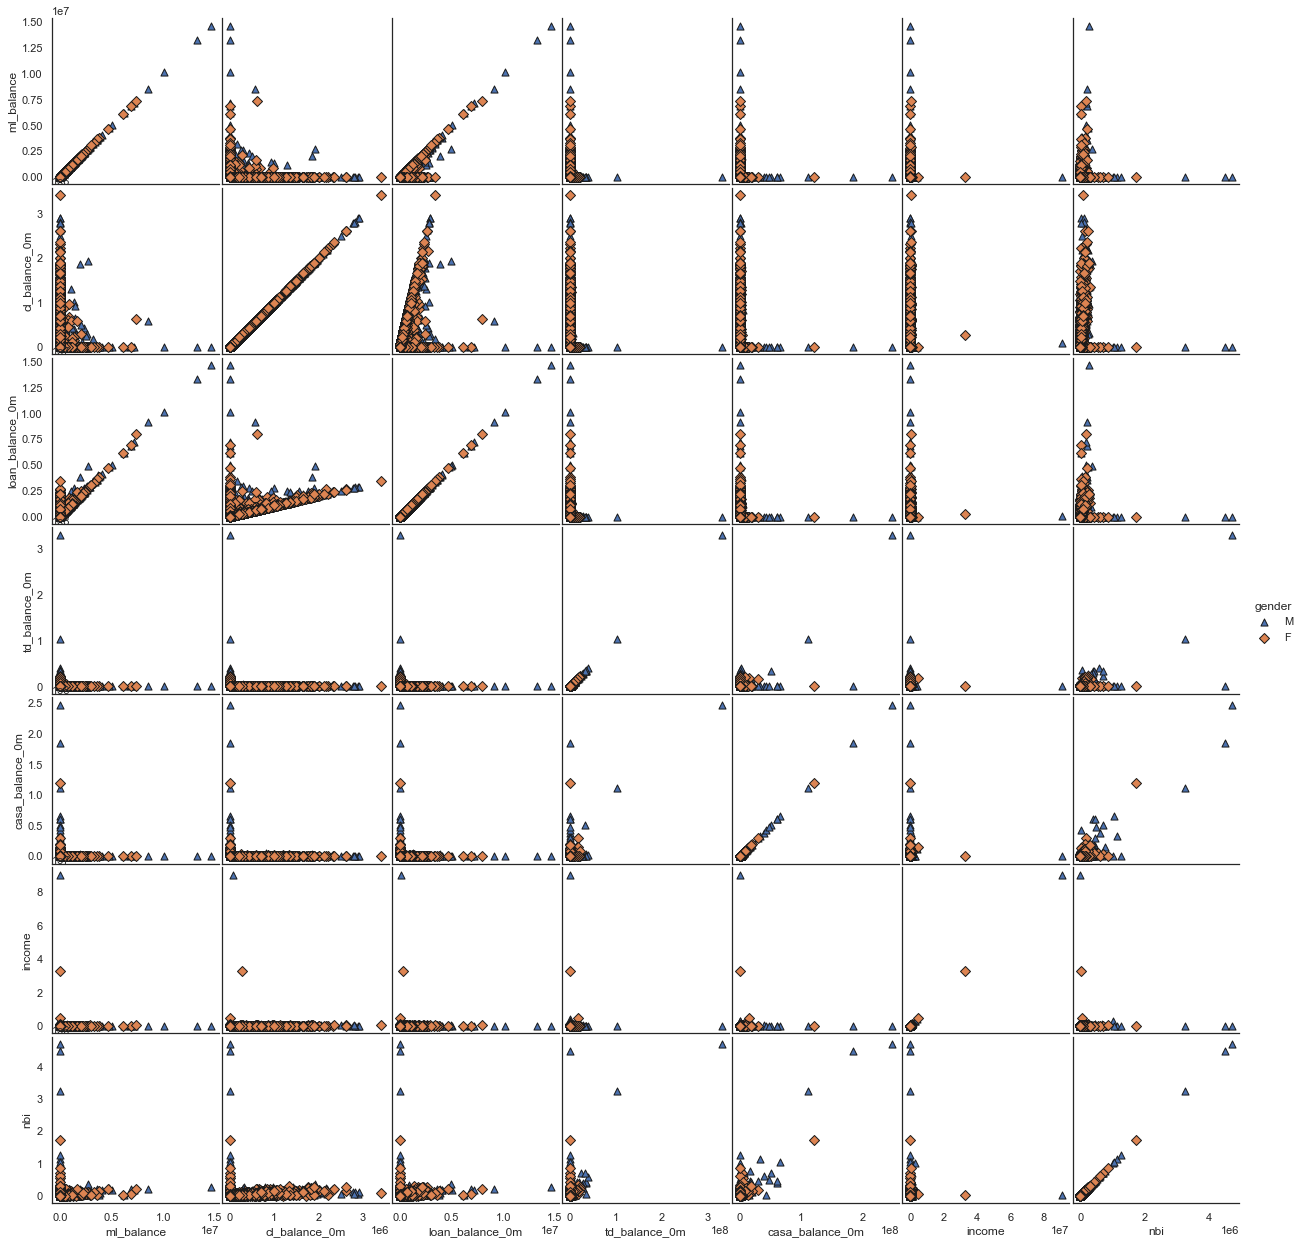

In [72]:
g = sns.PairGrid(
    items, 
    hue='gender', 
    hue_kws={"marker": ["^", "D"]}, 
)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# Подготовим данные в сводной сгруппируя по полу и типу города
df_grouped = df.groupby(["gender", "city_type"]).ml_balance.mean()
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.pivot('gender','city_type', 'ml_balance')
df_grouped.head()

city_type,100-500,1M+,500-1000,<100,Mega
gender,,,,,
F,9064.132048,10320.513950,7907.591880,6106.249082,24096.186103
М,10833.241212,24770.404146,12264.466048,9168.480967,24772.197355


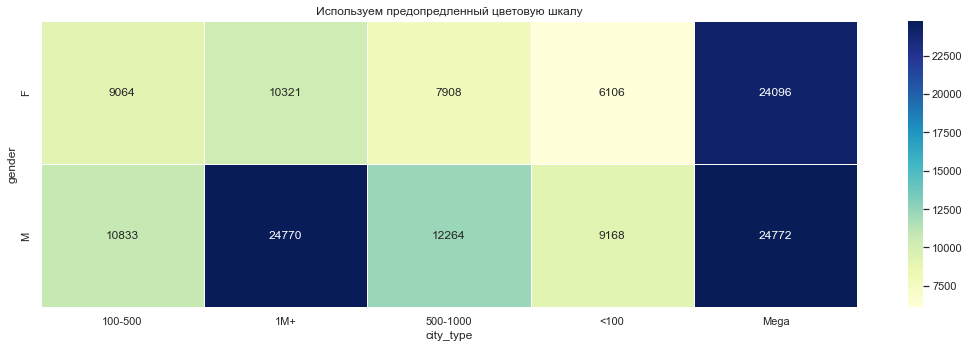

In [158]:
# Set up axes on which to plot various plots
fig, ax1 = plt.subplots(1,1, figsize=(15,5))

sns.heatmap(
    df_grouped, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu", 
    ax=ax1)
ax1.set_title('Используем предопредленный цветовую шкалу')

plt.tight_layout()
plt.show();

In [159]:
# расчитаем корреляцию 
corr = df.corr()

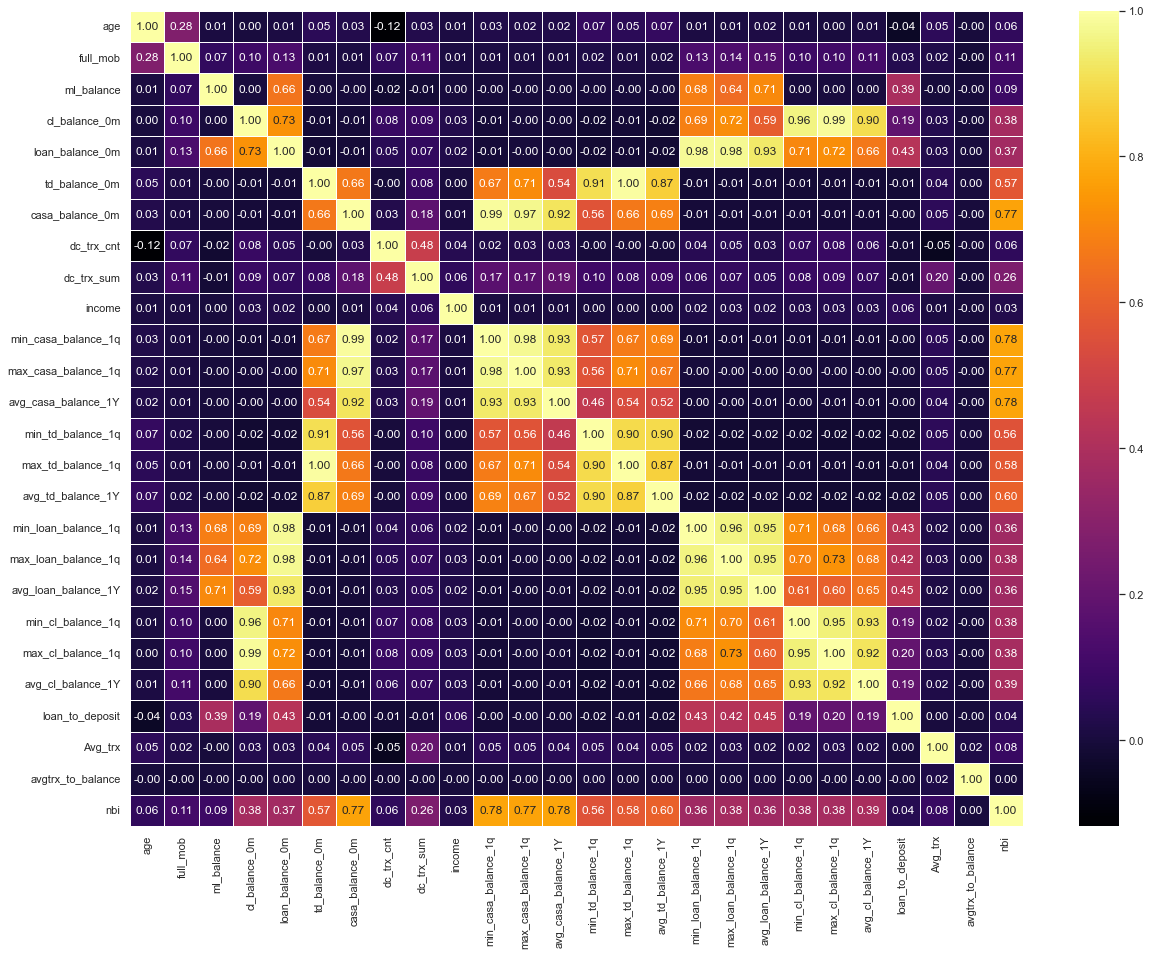

In [163]:
fig, ax1 = plt.subplots(1,1, figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1)
plt.show()
# взглянув на heatmap корреляции, можно увидеть, что возраст клиента немного влияет на длительность отношений с банком, что логично.

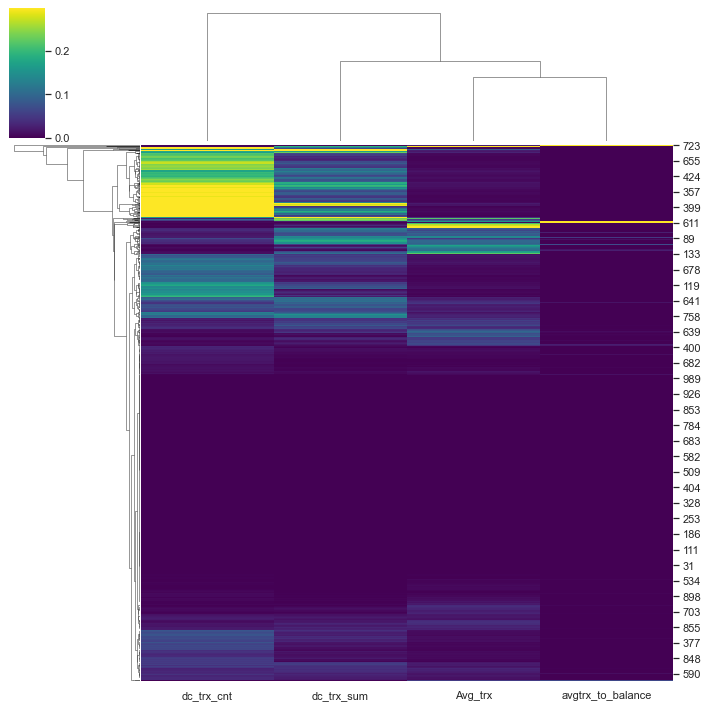

In [164]:
# лимит в 1000, иначе зависает
cluster_cols = ['dc_trx_cnt', 'dc_trx_sum', 'Avg_trx', 'avgtrx_to_balance']
df[cluster_cols] = df[cluster_cols].fillna(0)
g = sns.clustermap(
    df[cluster_cols].head(1000), 
    standard_scale=1, 
    robust=True,
    cmap='viridis'
)

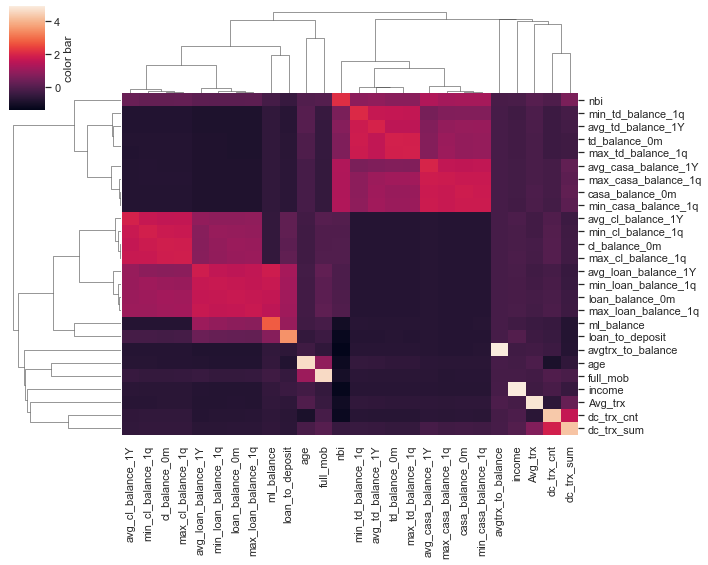

In [138]:
g = sns.clustermap(
    corr, 
    figsize=(10,8),  
    z_score=1, 
    cbar_kws={"label": "color bar"}
)

In [165]:
from sklearn.cluster import KMeans

df_head = df[cluster_cols]
kmeans = KMeans(n_clusters=3).fit(df_head)
centers = kmeans.cluster_centers_
res = kmeans.labels_
df_head['cluster'] = res

/var/folders/kt/1sfm6gq90v74_wnvcnkd8qgc0000gn/T/ipykernel_3294/1137238240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head['cluster'] = res


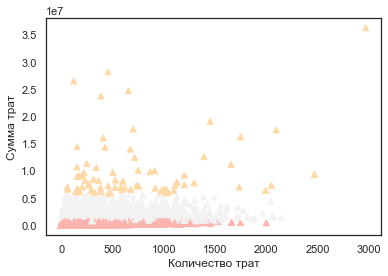

In [166]:
plt.scatter(df_head['dc_trx_cnt'], df_head['dc_trx_sum'], c=df_head['cluster'], marker='^', cmap='Pastel1')
plt.xlabel("Количество трат")
plt.ylabel("Сумма трат")
plt.show()

In [147]:
# если взглянуть на график, можно сделать вывод о том, что получилось разбить клиентов по трем кластерам: 
# розовый кластер - с маленьким объемом трат, желтый - со средним объемом трат и серый - с большим.